## 1. Warm-up.

In [2]:
#a. 
print("hello world")

hello world


In [3]:
#b.
import numpy as np

In [4]:
#c. 
x = 5
x = x**3 - 25 
print(x)

100


In [5]:
#d. 
y = np.linspace(0,10,11)
print(y[0])
print(y[1])
print(y[-1])
print(y[1:5])
print(y[5:])

0.0
1.0
10.0
[1. 2. 3. 4.]
[ 5.  6.  7.  8.  9. 10.]


In [6]:
#e. 
mask = (y>3)
print(y[mask])
print(y[y>3])

[ 4.  5.  6.  7.  8.  9. 10.]
[ 4.  5.  6.  7.  8.  9. 10.]


In [7]:
#f. 
a=np.array([0,1,2,3])
b=np.array([0,15,30,45])
print(2*a+a*b)

'''
a=np.array([0,1,2,3])
b=np.array([0,15,30,45,60])
print(2*a+a*b)
An error occur, says the two array doesn't match. 

'''

[  0  17  64 141]


"\na=np.array([0,1,2,3])\nb=np.array([0,15,30,45,60])\nprint(2*a+a*b)\nAn error occur, says the two array doesn't match. \n\n"

In [8]:
#g. 
x = 14.35244
print("%d"%(x))
print("%.3f"%(x))
print("%.4e"%(x))
print("%05d"%(x))

14
14.352
1.4352e+01
00014


In [9]:
#h.
def myfunc1(x):
    return x**2
    
print(myfunc1(2.7))

7.290000000000001


## 2. Write a linear regression function.

In [10]:
#a. 

def linfit(xdata, ydata, yerror):
    def U(n):
        U_n = sum((xdata**n)/(yerror**2), 0)
        return U_n
    def W(n): 
        W_n = sum(ydata * (xdata**n) / (yerror**2)) 
        return W_n
    D = U(0) * U(2) - (U(1)**2)
    slope = (U(0)*W(1) - U(1)*W(0)) / D
    intercept = (U(2)*W(0) - U(1)*W(1)) / D
    sigma_slope = U(0)/D
    sigma_intercept = U(2)/D
    print("results")
    print("slope = %.3f +/- %.3f"%(slope, sigma_slope))
    print("intercept = %.3f +/- %.3f"%(intercept, sigma_intercept))

#b. 

x = np.array([ 0., 1., 2., 3., 4., 5.])
y = np.array([ -8.0, -12.8, -17.7, -23.3, -27.6, -31.7])
yerr = np.array([ 0.2, -0.5, -0.9, -1.6, -2.0, -2.5])

linfit(x, y, yerr)

results
slope = -4.874 +/- 0.057
intercept = -7.994 +/- 0.037


numpy.ndarray

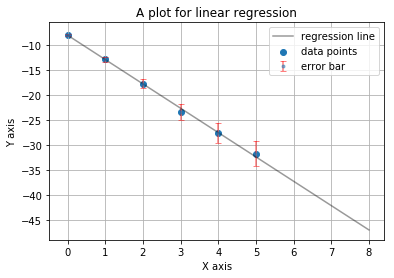

In [11]:
#c. 
from matplotlib.pyplot import *
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

x = np.array([ 0., 1., 2., 3., 4., 5.])
y = np.array([ -8.0, -12.8, -17.7, -23.3, -27.6, -31.7])
yerr = np.array([ 0.2, -0.5, -0.9, -1.6, -2.0, -2.5])

f = plt.figure()

j = np.linspace(0,8)
k = -4.874 * j - 7.994
plot(j,k,c='k',alpha=0.4)

scatter(x,y)
plt.errorbar(x, y, yerr=yerr,fmt='.',ecolor = 'r',alpha = 0.5,capsize=3)

plt.title('A plot for linear regression')
plt.xlabel('X axis')
plt.ylabel('Y axis')
grid()
legend(['regression line','data points','error bar'])

#f.savefig("001.pdf", bbox_inches='tight')

## 3. Plot the complex impedance.

In [12]:
#a. 
from numpy import *

def z(R,L,C,f):
    omega = 2 * pi * f
    z = ((1/R)+(1/(1j*omega*L))+(1j*omega*C)) ** (-1)
    return z

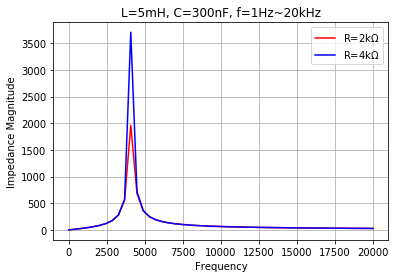

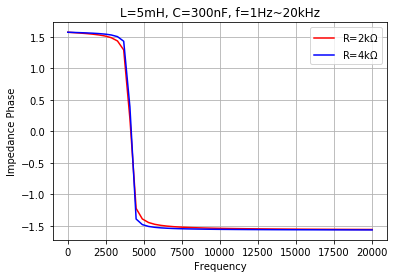

In [16]:
#b. 

from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')

f = linspace(1,20000)
R = 2e3
L =5e-3
C = 300e-9
zph = np.abs(z(R,L,C,f))
zang = np.angle(z(R,L,C,f))
zph2 = np.abs(z(R*2,L,C,f))
zang2 = np.angle(z(R*2,L,C,f))

plot(f,zph,c='red')
plot(f,zph2,c='blue')
plt.title('L=5mH, C=300nF, f=1Hz~20kHz')
plt.xlabel('Frequency')
plt.ylabel('Impedance Magnitude')
grid()
legend(['R=2k$\Omega$','R=4k$\Omega$'])
pp.savefig()

subplots(1)
plot(f,zang,c='red')
plot(f,zang2,c='blue')
plt.title('L=5mH, C=300nF, f=1Hz~20kHz')
plt.xlabel('Frequency')
plt.ylabel('Impedance Phase')
grid()
legend(['R=2k$\Omega$','R=4k$\Omega$'])
pp.savefig()
pp.close()

## 4. Basic if and for loops.

In [22]:
def ifp(x):
    for i in range(2,x):
        if (x%i) == 0:
            return False
    return True
            
        
for i in range(2,100):
    if ifp(i):
        print(i)
pass

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97


## BONUS. Visualizing the helium spectrum.

In [69]:
## this file is provided for use in the bonus question of the programming homework assignment
## this file is written in Python code

## helium spectral line data (these are Python "dictionaries")
Z0 = {'label':r'ZZ',    'degrees':0.  , 'arcmins':0.,   'color':r'#FFFAD2' , 'intensity':1.,  'order':0 }
A0 = {'label':r'$A_R$', 'degrees':7.5 , 'arcmins':5.,   'color':r'#2231ff' , 'intensity':.8,  'order':1 }
A1 = {'label':r'$A_L$', 'degrees':-7.5, 'arcmins':-5.,  'color':r'#2231ff' , 'intensity':.8,  'order':1 }
B0 = {'label':r'$B_R$', 'degrees':7.5 , 'arcmins':29.,  'color':r'#1845e6' , 'intensity':.6,  'order':1 }
B1 = {'label':r'$B_L$', 'degrees':-7.5, 'arcmins':-29., 'color':r'#1845e6' , 'intensity':.6,  'order':1 }
C0 = {'label':r'$C_R$', 'degrees':8.  , 'arcmins':23.,  'color':r'#07d3De' , 'intensity':.7,  'order':1 }
C1 = {'label':r'$C_L$', 'degrees':-8. , 'arcmins':-23., 'color':r'#07d3De' , 'intensity':.7,  'order':1 }
D0 = {'label':r'$D_R$', 'degrees':8.5 , 'arcmins':0.,   'color':r'#02fffa' , 'intensity':.9,  'order':1 }
D1 = {'label':r'$D_L$', 'degrees':-8.5, 'arcmins':-0.,  'color':r'#02fffa' , 'intensity':.9,  'order':1 }
E0 = {'label':r'$E_R$', 'degrees':10. , 'arcmins':1.,   'color':r'#FAFF41' , 'intensity':.95, 'order':1 }
E1 = {'label':r'$E_L$', 'degrees':-10., 'arcmins':-1.,  'color':r'#FAFF41' , 'intensity':.95, 'order':1 }
F0 = {'label':r'$F_R$', 'degrees':11. , 'arcmins':24.,  'color':r'#FF80A9' , 'intensity':.7,  'order':1 }
F1 = {'label':r'$F_L$', 'degrees':-11., 'arcmins':-24., 'color':r'#FF80A9' , 'intensity':.7,  'order':1 }
G0 = {'label':r'$G_R$', 'degrees':12. , 'arcmins':10.,  'color':r'#DE4C4F' , 'intensity':.6,  'order':1 }
G1 = {'label':r'$G_L$', 'degrees':-12., 'arcmins':-10., 'color':r'#DE4C4F' , 'intensity':.6,  'order':1 }

## list of lines
lines = [Z0,A0,A1,B0,B1,C0,C1,D0,D1,E0,E1,F0,F1,G0,G1]

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


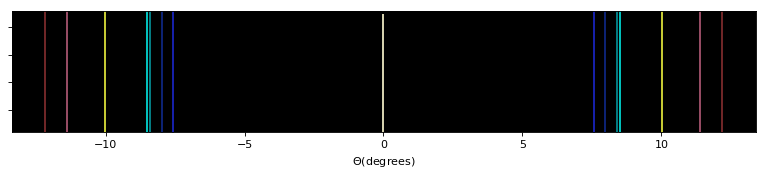

In [92]:
from matplotlib.pyplot import *
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

f=plt.figure(figsize=(12, 2), dpi=80)

for i in lines:
    fig = plt.figure(1)
    ax = fig.add_subplot(111, axisbg='black')
    ax.scatter((i['degrees']+i['arcmins']/60),i['order'],color=i['color'],alpha=i['intensity'],marker='|',s=15000)
    fig.canvas.draw()
    
    

plt.xlabel('$\Theta$(degrees)')
ax.set_yticklabels([])
#f.savefig("005.pdf", bbox_inches='tight')